# Roadmap 

## high priority
- normal logging
- Align stamps_ns
- unwrap yaw
- Save dataset
- Check train/val split

## mid priority
- folds
- Merge predictions
- pseudolabling


## low priority
- fill missing meta based on date and existing meta

# Read data

In [197]:
import os
import typing
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.interpolate import interp1d
import numpy as np
import json
import pandas as pd

In [2]:
def read_testcase_ids(dataset_path: str):
    ids = sorted([int(case_id) for case_id in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, case_id))])
    return ids

def read_metadata(metadata_path: str):
    with open(metadata_path, 'r') as f:
        data = json.load(f)
    data['tires_front'] = data['tires']['front']
    data['tires_rear'] = data['tires']['rear']
    data.pop('tires')
    return data

def create_meta_mapping(metas):
    mapping = {
    'vehicle_id': [],
    'vehicle_model': [],
    'vehicle_model_modification': [],
    'location_reference_point_id': [],
    'tires_front': [],
    'tires_rear': [],
    }
    
    for meta in metas:
        for k in mapping:
            mapping[k].append(meta[k])
    
    for k, lst in mapping.items():
        unk = Counter(lst).most_common()[0][0]
    
        v = sorted(set(lst))
        map = {str(label): idx for idx, label in enumerate(v)}
        mapping[k] = {'map': map, 'unk': str(unk)}
    return mapping

In [3]:
ROOT_DATA_FOLDER = "./dataset"

TRAIN_DATASET_PATH = os.path.join(ROOT_DATA_FOLDER, "YaCupTrain")
TEST_DATASET_PATH = os.path.join(ROOT_DATA_FOLDER, "YaCupTest")

In [4]:
train_ids = read_testcase_ids(TRAIN_DATASET_PATH)
all_train_ids = deepcopy(train_ids)
len(train_ids)

42000

In [5]:
test_ids = read_testcase_ids(TEST_DATASET_PATH)
len(test_ids)

8000

In [6]:
def read_sample(dataset_path, sample_id, is_test=False):
    sample_id = str(sample_id)
    sample = {}
    sample['localization'] = pd.read_csv(os.path.join(dataset_path, sample_id, 'localization.csv'))
    sample['control'] = pd.read_csv(os.path.join(dataset_path, sample_id, 'control.csv'))
    sample['metadata'] = read_metadata(os.path.join(dataset_path, sample_id, 'metadata.json'))
    if is_test:
        sample['requested_stamps'] = pd.read_csv(os.path.join(dataset_path, sample_id, 'requested_stamps.csv'))
    return sample

## Som stuff

In [40]:
sample_id = str(train_ids[1])

In [41]:
sample = read_sample(TRAIN_DATASET_PATH, sample_id)

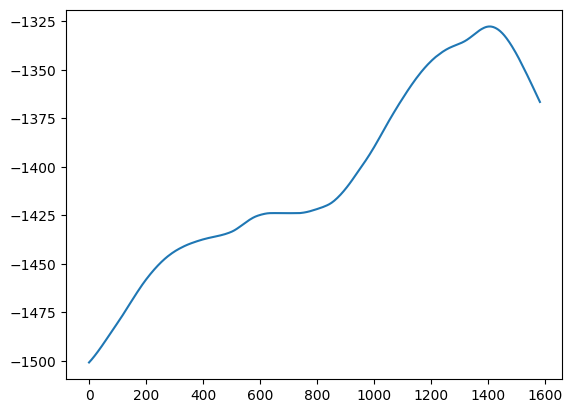

In [42]:
plt.plot(sample['localization']['x'])

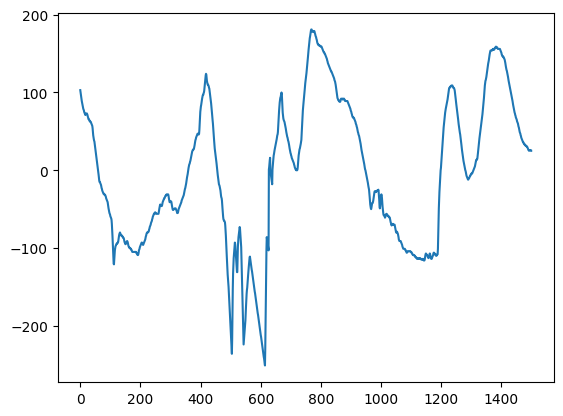

In [43]:
plt.plot(sample['control']['acceleration_level'])

In [221]:
sample = read_sample(TEST_DATASET_PATH, test_ids[11], is_test=True)

In [222]:
sample['localization']

,stamp_ns,x,y,z,roll,pitch,yaw
0,40062129,-7768.516700,-4470.420973,16.611094,0.018632,0.002930,2.196331
1,79798480,-7768.860666,-4469.945233,16.609306,0.017704,0.003171,2.196386
2,119999653,-7769.208506,-4469.467434,16.599237,0.018240,0.003536,2.196406
3,159614309,-7769.553378,-4468.991303,16.596748,0.018456,0.004075,2.196310
4,199788760,-7769.902885,-4468.513143,16.595050,0.016344,0.004498,2.196199
...,...,...,...,...,...,...,...
120,4839988830,-7807.650684,-4415.935775,16.067415,0.023719,-0.002925,2.200971
121,4879960688,-7807.957393,-4415.507833,16.063399,0.022402,-0.003406,2.200991
122,4919272780,-7808.266014,-4415.084127,16.065294,0.021795,-0.003667,2.201037
123,4959843865,-7808.576920,-4414.650061,16.063682,0.020913,-0.003680,2.201041


In [226]:
sample['control'][sample['control']['stamp_ns'] > 4_999_984_349]

,stamp_ns,acceleration_level,steering
125,5004912703,24,3.605583
126,5044805299,24,3.605583
127,5084861506,24,3.548769
128,5125552658,25,3.498528
129,5165056060,25,3.498528
...,...,...,...
495,19805470729,29,-0.211248
496,19845351282,30,0.285437
497,19885288248,30,0.791947
498,19925362125,31,1.260414


In [227]:
sample['requested_stamps']

,stamp_ns
0,5039451807
1,5079621728
2,5119452721
3,5159264476
4,5199673459
...,...
370,19839941445
371,19879321761
372,19919228017
373,19959674373


In [113]:
localization = sample['localization']
control = sample['control']

In [ ]:
def resample_sequence(df, target_)

In [116]:
(localization.stamp_ns.max()  - localization.stamp_ns.min()) * 1e-9

63.239467231000006

In [117]:
(control.stamp_ns.max()  - control.stamp_ns.min()) * 1e-9

59.960340216000006

In [126]:
SAMPLING_INTERVAL_NS = 4e7

In [137]:
(60 * 1e9 / 4e7)

1500.0

In [130]:
timestamps = np.linspace(0, 60, 1500)  # временные метки в диапазоне 60 секунд

In [139]:
localization_df = localization
control_df = control

In [153]:
STEP_S = 0.04
STEP_NS = int(STEP_S * 1e9)

In [157]:
STEP_NS

40000000

In [230]:
start_ns = localization.stamp_ns.values[0]
end_ns = localization.stamp_ns.values[-1]

In [231]:
y = localization.x.values

In [232]:
new_stamps = np.arange(start_ns, end_ns, STEP_NS)

In [233]:
old_stamps = localization.stamp_ns.values

In [234]:
df = resample_data(localization, old_stamps, new_stamps)

KeyboardInterrupt: 

In [ ]:
df

In [180]:
f_fft = signal.resample(y, 30000)

In [181]:
f_fft.shape

(30000,)

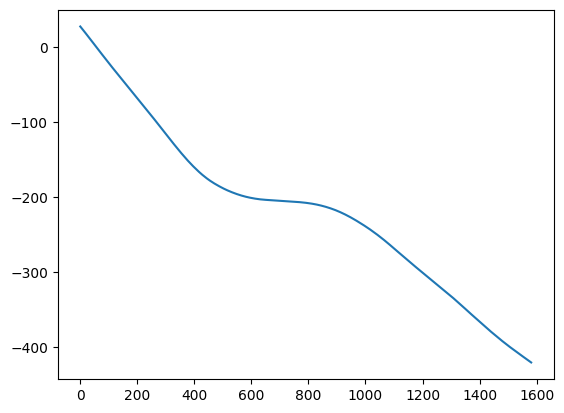

In [182]:
plt.plot(y)

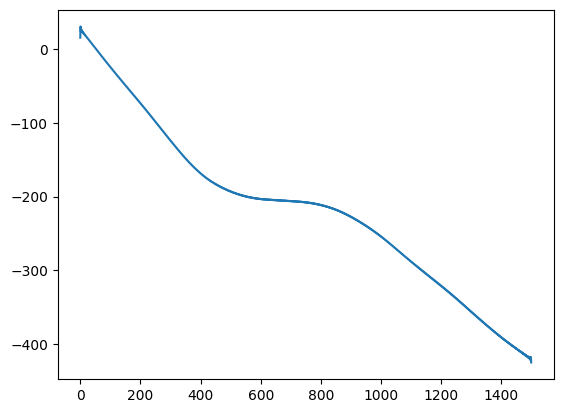

In [178]:
plt.plot(f_fft)

In [ ]:
f_fft = signal.resample(y, 100)
f_poly = signal.resample_poly(y, 100, 20)
xnew = np.linspace(0, 10, 100, endpoint=False)

In [150]:
ns_interval

63239467231

In [145]:
SAMPLING_INTERVAL_NS / 0.04

1000000000.0

In [ ]:
sampling_interval_ns = 4e7  # 0.04 seconds in nanoseconds
initial_state_length = int(5 / 0.04)  # Steps for initial 5 seconds (125 steps)
target_length = int(15 / 0.04)  # Steps from 5s to 20s (375 steps)
sequence_length = initial_state_length + target_length  # Total steps (500 steps)


In [142]:
localization

,stamp_ns,x,y,z,roll,pitch,yaw
0,0,27.131617,-366.045512,-19.666383,0.012236,-0.024021,-2.497225
1,39541551,26.667198,-366.393704,-19.652679,0.012351,-0.023556,-2.499309
2,79725833,26.197744,-366.747620,-19.650539,0.011797,-0.024136,-2.501485
3,119545950,25.728305,-367.096412,-19.636367,0.012441,-0.024352,-2.503733
4,159487936,25.257570,-367.445001,-19.625420,0.011556,-0.025613,-2.505889
...,...,...,...,...,...,...,...
1577,63079836550,-419.456064,-678.358251,-14.743051,0.027222,-0.001556,-2.230185
1578,63119513545,-419.727021,-678.707938,-14.742394,0.027048,-0.001283,-2.230019
1579,63160013543,-420.003863,-679.064752,-14.741960,0.025183,-0.003187,-2.229958
1580,63199572340,-420.274159,-679.413737,-14.740327,0.024127,-0.004394,-2.229794


ValueError: x and y must have same first dimension, but have shapes (1500,) and (1582,)

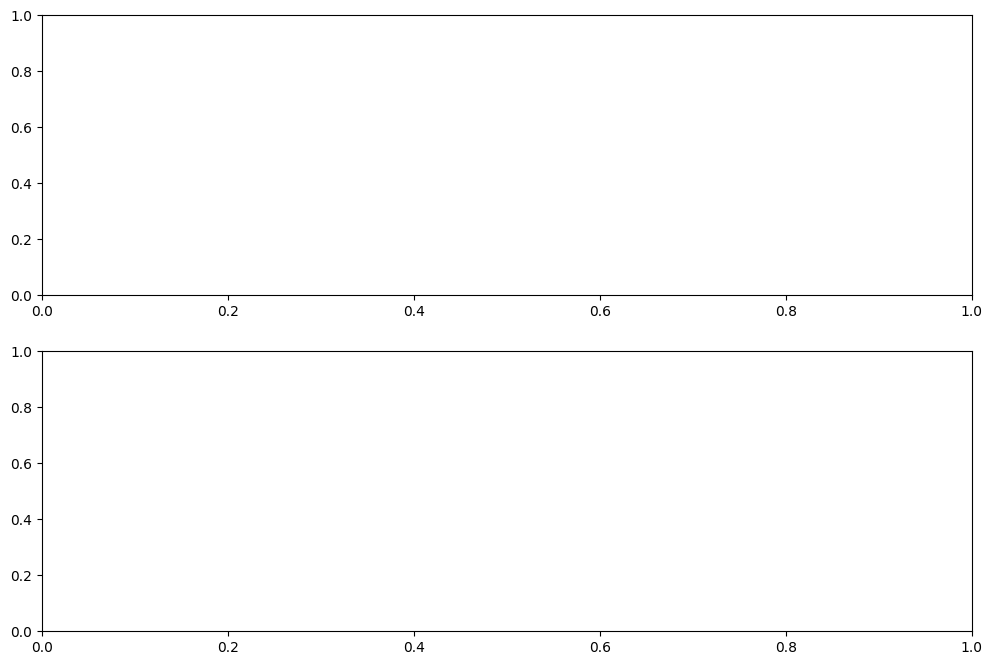

In [141]:
# Параметры для resample_poly
# Задаем исходный шаг (например, если шаг 0.02 секунды)
original_step = 0.02  # например, текущий временной шаг 20 мс
target_step = 0.04  # целевой временной шаг 40 мс
up = int(target_step * 1000)  # множитель увеличения
down = int(original_step * 1000)  # множитель уменьшения

# Функция для ресемплинга на основе resample_poly
def resample_series(data_series, up, down):
    return signal.resample_poly(data_series, up, down, window=('kaiser', 5.0), padtype='constant')

# Применение ресемплинга для всех фичей localization и control
resampled_localization = {col: resample_series(localization_df[col].values, up, down) for col in localization_df.columns}
resampled_control = {col: resample_series(control_df[col].values, up, down) for col in control_df.columns}

# Создание DataFrame с новыми значениями
resampled_localization_df = pd.DataFrame(resampled_localization)
resampled_control_df = pd.DataFrame(resampled_control)

# Визуализация результатов ресемплинга для примера с x (localization) и acceleration_level (control)
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Исходные и ресемплированные данные для localization (x)
axs[0].plot(timestamps, localization_df['x'], label="Original x", alpha=0.7)
new_timestamps = np.linspace(0, 60, len(resampled_localization_df))
axs[0].plot(new_timestamps, resampled_localization_df['x'], label="Resampled x", alpha=0.7)
axs[0].set_title("Localization Data (x coordinate)")
axs[0].legend()

# # Исходные и ресемплированные данные для control (acceleration_level)
# axs[1].plot(timestamps, control_df['acceleration_level'], label="Original Acceleration", alpha=0.7)
# axs[1].plot(new_timestamps, resampled_control_df['acceleration_level'], label="Resampled Acceleration", alpha=0.7)
# axs[1].set_title("Control Data (acceleration_level)")
# axs[1].legend()

# plt.tight_layout()
# plt.show()

In [127]:
from scipy import signal

In [128]:
x = np.linspace(0, 10, 20, endpoint=False)
y = np.cos(-x**2/6.0)
f_fft = signal.resample(y, 100)
f_poly = signal.resample_poly(y, 100, 20)
xnew = np.linspace(0, 10, 100, endpoint=False)

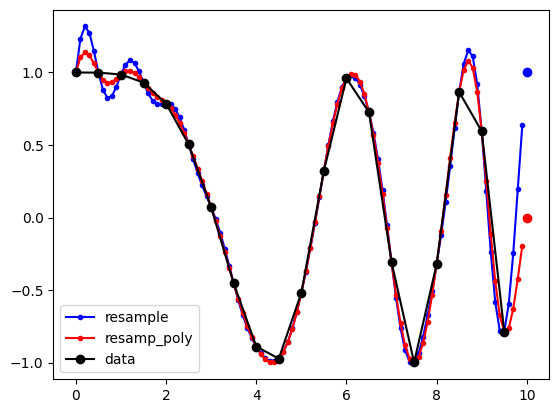

In [129]:
plt.plot(xnew, f_fft, 'b.-', xnew, f_poly, 'r.-')
plt.plot(x, y, 'ko-')
plt.plot(10, y[0], 'bo', 10, 0., 'ro')  # boundaries
plt.legend(['resample', 'resamp_poly', 'data'], loc='best')
plt.show()

In [119]:
control[control.stamp_ns > localization.stamp_ns.min()].shape

(1500, 3)

In [120]:
localization[localization.stamp_ns > control.stamp_ns.min()].shape

(1507, 7)

In [115]:
63239467231 b* 1e-9

63.239467231000006

In [ ]:
def interpolate_sequence(df, target_timestamps, features):
    interpolated = {}
    for feature in features:
        if df['stamp_ns'].nunique() < 2:
            interpolated[feature] = np.full_like(target_timestamps, fill_value=df[feature].iloc[0], dtype=np.float32)
            continue
        try:
            interp_func = interp1d(df['stamp_ns'], df[feature], kind='linear', bounds_error=False, fill_value='extrapolate')
            interpolated[feature] = interp_func(target_timestamps)
        except Exception as e:
            print(f"Ошибка интерполяции фичи {feature}: {e}")
            interpolated[feature] = np.zeros_like(target_timestamps, dtype=np.float32)
    return np.stack([interpolated[feat] for feat in features], axis=1)


In [40]:
control.head()

,stamp_ns,acceleration_level,steering
0,2998809740,5418,-3.022154
1,3039454440,5462,-2.936776
2,3079187498,5466,-2.857246
3,3118400841,5444,-2.788293
4,3159129714,5405,-2.721787


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [54]:
testcase_ids = train_ids

In [110]:
# # Инициализация списка для сбора данных
# data_records = []

# # Сбор данных
# for testcase_id in tqdm(testcase_ids, desc="Loading Training Data"):
#     sample = read_sample(TRAIN_DATASET_PATH, str(testcase_id))
    
#     metadata = sample['metadata']
#     vehicle_id = metadata['vehicle_id']
#     vehicle_model = metadata['vehicle_model']
#     vehicle_modification = metadata['vehicle_model_modification']
    
#     # Преобразование данных управления
#     control = sample['control'][['acceleration_level', 'steering']].values
    
#     # Добавление данных в записи
#     for acc, steer in control:
#         data_records.append({
#             'vehicle_id': vehicle_id,
#             'vehicle_model': vehicle_model,
#             'vehicle_modification': vehicle_modification,
#             'acceleration_level': acc,
#             'steering': steer
#         })


In [111]:
# vals = []
# for testcase_id in tqdm(testcase_ids[:1000], desc="Loading Training Data"):
#     sample = read_sample(TRAIN_DATASET_PATH, str(testcase_id))
#     path = sample['localization'][['x', 'y', 'z']].values[:, :500]
#     start = path[0].copy()
#     path -= start
#     vals.append(path[-1])

In [109]:
localization

,stamp_ns,x,y,z,roll,pitch,yaw
0,0,0.027132,-0.366046,-0.019666,0.012236,-0.024021,-2.497225
1,39541551,0.026667,-0.366394,-0.019653,0.012351,-0.023556,-2.499309
2,79725833,0.026198,-0.366748,-0.019651,0.011797,-0.024136,-2.501485
3,119545950,0.025728,-0.367096,-0.019636,0.012441,-0.024352,-2.503733
4,159487936,0.025258,-0.367445,-0.019625,0.011556,-0.025613,-2.505889
...,...,...,...,...,...,...,...
1577,63079836550,-0.419456,-0.678358,-0.014743,0.027222,-0.001556,-2.230185
1578,63119513545,-0.419727,-0.678708,-0.014742,0.027048,-0.001283,-2.230019
1579,63160013543,-0.420004,-0.679065,-0.014742,0.025183,-0.003187,-2.229958
1580,63199572340,-0.420274,-0.679414,-0.014740,0.024127,-0.004394,-2.229794


In [107]:
localization[['x', 'y', 'z']] /= 1000

In [106]:
bnp.max(vals, 0)

array([972.6458463 , 828.42901918,  34.06894794])

In [103]:
np.max(vals, 0)

array([972.6458463 , 828.42901918,  34.06894794])

In [104]:
np.sort(vals, 0)

array([[-995.71027203, -925.1384698 ,  -25.00713434],
       [-980.63475336, -802.52340511,  -24.41440236],
       [-867.9914927 , -790.42112072,  -24.30737786],
       ...,
       [ 967.12162926,  710.7757317 ,   24.1079809 ],
       [ 972.29301905,  738.34209486,   31.72400571],
       [ 972.6458463 ,  828.42901918,   34.06894794]])

In [95]:
# 16m/s == 60km/h

In [86]:
path = localization[['x', 'y', 'z']].values

In [88]:
start = path[0].copy()

In [89]:
path -= start

In [98]:
path / 100

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.64419831e-03, -3.48191291e-03,  1.37043711e-04],
       [-9.33873906e-03, -7.02107868e-03,  1.58447256e-04],
       ...,
       [-4.47135480e+00, -3.13019240e+00,  4.92442361e-02],
       [-4.47405777e+00, -3.13368225e+00,  4.92605653e-02],
       [-4.47679442e+00, -3.13721883e+00,  4.92830549e-02]])

In [58]:
df = pd.DataFrame(data_records)

In [ ]:
# Создание DataFrame
df = pd.DataFrame(data_records)

# Просмотр первых нескольких строк
print(df.head())

In [60]:
stats = df.groupby(['vehicle_id', 'vehicle_model', 'vehicle_modification'])['acceleration_level'].agg(['mean', 'std', 'min', 'max', 'median']).reset_index()

In [62]:
stats['vehicle_model'].value_counts()

1    94
0    37
Name: vehicle_model, dtype: int64

In [75]:
0.922322 / 10

0.0922322

In [81]:
df.groupby(['vehicle_model'])['acceleration_level'].agg(['mean', 'std', 'min', 'max', 'median']).reset_index() / 3000

,vehicle_model,mean,std,min,max,median
0,0.000,-0.045488,0.151794,-0.6,0.280,-0.001
1,0.001,1.850038,4.851745,-6.0,29.289,0.232


In [71]:
df.groupby(['vehicle_model'])['steering'].agg(['mean', 'std', 'min', 'max', 'median']).reset_index() / 1000

,vehicle_model,mean,std,min,max,median
0,0.000,0.000922,0.057236,-0.460000,0.4600,-0.000527
1,0.001,-0.005734,0.047205,-0.401193,0.3876,-0.003760


In [ ]:
df.groupby(['vehicle_model'])['ste'].agg(['mean', 'std', 'min', 'max', 'median']).reset_index()

In [69]:
232.0 / 3_000

0.07733333333333334

In [66]:
4851.744984 / 100

48.51744984

In [65]:
1850.037913 / 100

18.50037913

In [64]:
29289.0 / 280.0

104.60357142857143

In [61]:
stats

,vehicle_id,vehicle_model,vehicle_modification,mean,std,min,max,median
0,0,0,0,-87.911389,191.176526,-450.0,280.0,-12.0
1,1,0,0,-69.137781,178.429840,-450.0,277.0,-5.0
2,2,0,0,-2.735943,77.434924,-600.0,249.0,5.0
3,3,0,0,-1.981938,75.822905,-450.0,243.0,5.0
4,4,1,1,3245.638653,5540.261295,-6000.0,29289.0,1793.0
...,...,...,...,...,...,...,...,...
126,126,1,2,5254.443361,5145.327475,-4500.0,23444.0,6370.5
127,127,1,2,2859.409829,3248.879427,-6000.0,22316.0,3029.0
128,128,1,1,1916.356167,4212.782312,-4500.0,14325.0,1547.0
129,129,1,5,3005.448941,3038.034786,-2398.0,14501.0,2806.0


In [ ]:
# Группировка по vehicle_id, vehicle_model, vehicle_model_modification и вычисление статистик
stats = df.groupby(['vehicle_id', 'vehicle_model', 'vehicle_modification'])['acceleration_level'].agg(['mean', 'std', 'min', 'max', 'median']).reset_index()

# Вывод статистики
print(stats.head())

In [ ]:
for testcase_id in tqdm(testcase_ids, desc="Loading Training Data"):
    sample = read_sample(TRAIN_DATASET_PATH, testcase_id)
    
    metadata = sample['metadata']
    vehicle_model = vehicle_model_mapping.get(metadata['vehicle_model'], unknown_vehicle_model_idx)
    vehicle_modification = vehicle_modification_mapping.get(metadata['vehicle_model_modification'], unknown_vehicle_modification_idx)
    tires_front = tires_mapping.get(metadata['tires_front'], unknown_tires_idx)
    tires_rear = tires_mapping.get(metadata['tires_rear'], unknown_tires_idx)
    
    # Преобразование данных локализации и управления
    localization = sample['localization'][['x', 'y', 'z', 'roll', 'pitch', 'yaw']].values
    control = sample['control'][['acceleration_level', 'steering']].values
    
    # Добавление в записи
    for acc, steer in zip(control[:,0], control[:,1]):
        data_records.append({
            'vehicle_model': vehicle_model,
            'vehicle_modification': vehicle_modification,
            'tires_front': tires_front,
            'tires_rear': tires_rear,
            'acceleration_level': acc,
            'steering': steer
        })

# Создание DataFrame
df = pd.DataFrame(data_records)

# Просмотр первых нескольких строк
print(df.head())

In [10]:
import os
import typing
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# DL dataset

In [12]:
# metas = []
# for testcase_id in train_ids:
#     meta = read_metadata(os.path.join(TRAIN_DATASET_PATH, str(testcase_id), 'metadata.json'))
#     metas.append(meta)
# mapping = create_meta_mapping(metas)
# with open('./dataset/mapping.json', 'w') as f:
#     json.dump(mapping, f)
mapping = json.load(open('./dataset/mapping.json', 'r'))
for k, v in mapping.items():
    mapping[k]['map'] = {int(k):int(v) for k,v in v['map'].items()}
    mapping[k]['unk'] = int(v['unk'])
    assert v['unk'] in mapping[k]['map']
mapping['vehicle_model']['acc_denum_map'] = {
    0: 3000,
    1: 300,
}

## Label categories

## train/val split

In [13]:
val_ratio = 0.2

val_size = int(len(train_ids) * val_ratio)
val_identifiers = set(train_ids[:val_size])
train_identifiers = set(train_ids[val_size:])

In [14]:
len(val_identifiers)

8400

In [15]:
len(train_identifiers)

33600

In [16]:
# import random

# def split_identifiers(identifiers, val_ratio=0.2):
#     identifiers = list(identifiers)
#     random.shuffle(identifiers)
    # val_size = int(len(identifiers) * val_ratio)
    # val_identifiers = set(identifiers[:val_size])
    # train_identifiers = set(identifiers[val_size:])
#     return train_identifiers, val_identifiers

# # Split location_reference_point_id
# train_location_ids, val_location_ids = split_identifiers(location_ids, val_ratio=val_ratio)

# # Optionally, split vehicle_ids and vehicle_models similarly
# train_vehicle_ids, val_vehicle_ids = split_identifiers(vehicle_ids)
# train_vehicle_models, val_vehicle_models = split_identifiers(vehicle_modifications)
# train_data = {}
# val_data = {}

# for testcase_id, testcase in train_dataset.items():
#     metadata = testcase['metadata']
#     location_id = metadata['location_reference_point_id']
#     vehicle_id = metadata['vehicle_id']
#     vehicle_model = metadata['vehicle_model']
    
#     # Determine whether to include the sample in training or validation set
#     if (location_id in train_location_ids and
#         vehicle_id in train_vehicle_ids and
#         vehicle_model in train_vehicle_models):
#         train_data[testcase_id] = testcase
#     else:
#         val_data[testcase_id] = testcase

# # Check for overlaps
# assert not set(train_data.keys()) & set(val_data.keys()), "Overlap between training and validation sets"

## torch Dataset

In [17]:
import torch
from torch.utils.data import Dataset
from copy import deepcopy

In [19]:
NS_TO_SEC = 1e-9
SEC_TO_NS = 1e9

In [20]:
63 * SEC_TO_NS

63000000000.0

In [212]:
class TrajectoryDataset(Dataset):
    def __init__(self, dataset_path: str, mapping: dict, testcase_ids=None, sliding_step: int = 125, training=True):
        self.data = []
        NS_TO_SEC = 1e-9
        self.mapping = mapping

        sampling_interval_ns = 4e7  # 0.04 seconds in nanoseconds
        initial_state_length = int(5 / 0.04)  # Steps for initial 5 seconds (125 steps)
        target_length = int(15 / 0.04)  # Steps from 5s to 20s (375 steps)
        sequence_length = initial_state_length + target_length  # Total steps (500 steps)
        time_steps = np.arange(0, 60 * 1e9, sampling_interval_ns)
        
        if testcase_ids is None:
            testcase_ids = sorted([name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))])

        
        for testcase_id in tqdm(testcase_ids):
            testcase_id = str(testcase_id)
            testcase_path = os.path.join(dataset_path, testcase_id)
            metadata = read_metadata(os.path.join(testcase_path, 'metadata.json'))
            vehicle_features = self.encode_vehicle_features(metadata)
            acc_denum = self.mapping['vehicle_model']['acc_denum_map'].get(metadata['vehicle_model'], self.mapping['vehicle_model']['unk'])
            steer_denum = 300

            # Загружаем данные управления и локализации
            control = pd.read_csv(os.path.join(testcase_path, 'control.csv'))
            # control['acceleration_level'] /= acc_denum
            # control['steering'] /= steer_denum

            localization = pd.read_csv(os.path.join(testcase_path, 'localization.csv'))
            # localization[['x', 'y', 'z']] /= 1000  # Преобразуем в километры, если необходимо

            localization_resampled = localization.set_index('stamp_ns').reindex(time_steps, method='nearest').reset_index().values[:, 1:]
            control_resampled = control.set_index('stamp_ns').reindex(time_steps, method='nearest').reset_index().values[:, 1:]
            

            max_start_idx = len(time_steps) - sequence_length
            for i in range(0, max_start_idx, sliding_step):  # Slide window
                # Initial localization sequence (first 5 seconds)
                
                input_localization = deepcopy(localization_resampled[i:i+initial_state_length])  # Shape: [125, 3]
                
                start_position = deepcopy(input_localization[0][:3])
                
                input_localization[:, :3] -= start_position # Shift initial localization to zero
                
                # Target trajectory from t + 5s to t + 20s
                output_localization = deepcopy(localization_resampled[i+initial_state_length:i+sequence_length]) # Shape: [375, 3]
                output_localization[:, :3] -= start_position
            
                # Initial and inference control sequence
                input_control_sequence = deepcopy(control_resampled[i:i+initial_state_length])
                output_control_sequence = deepcopy(control_resampled[i+initial_state_length:i+sequence_length])
                
            
                self.data.append({
                    'vehicle_features': vehicle_features,
                    'input_localization': input_localization,
                    'output_localization': output_localization,
                    'input_control': input_control_sequence,
                    'output_control': output_control_sequence,
                })

    def encode_vehicle_features(self, metadata):
        feats = []
        for k, map_n_unk in self.mapping.items():
            feats.append(int(map_n_unk['map'].get(metadata[k], map_n_unk['unk'])))
        return feats

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        tensor_dict = {}
        for k, v in sample.items():
            if k.startswith('vehicle'):
                tensor_dict[k] = torch.tensor(v, dtype=torch.long)
            else:
                tensor_dict[k] = torch.tensor(v, dtype=torch.float32)
        return tensor_dict


In [213]:
import itertools
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

In [278]:
train_dataset = TrajectoryDataset(TRAIN_DATASET_PATH, mapping, testcase_ids=list(train_identifiers)[:], sliding_step=75, training=True)
val_dataset = TrajectoryDataset(TRAIN_DATASET_PATH, mapping, testcase_ids=list(val_identifiers)[:], sliding_step=125, training=False)

# train_dataset = TrajectoryDataset(dict(itertools.islice(train_data.items(), 100)), mapping, sliding_step=125, training=True)
# val_dataset = TrajectoryDataset(dict(itertools.islice(val_data.items(), 100)), mapping, sliding_step=125, training=False)


100%|██████████| 8400/8400 [02:52<00:00, 48.71it/s]


In [215]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    """
    Custom collate function to handle variable-length sequences for seq2seq tasks.
    """
    # Extract vehicle_features and stack them
    vehicle_features = torch.stack([torch.tensor(sample['vehicle_features'], dtype=torch.long) for sample in batch], dim=0)  # [batch_size, num_vehicle_features]
    
    # Extract input_localization_seq sequences and lengths
    input_localization_seqs = [sample['input_localization_seq'] for sample in batch]
    input_localization_lengths = torch.tensor([len(seq) for seq in input_localization_seqs], dtype=torch.long)
    # Pad input_localization_seqs
    input_localization_seq_padded = pad_sequence(
        [torch.tensor(seq, dtype=torch.float32) for seq in input_localization_seqs],
        batch_first=True,
        padding_value=0.0
    )  # [batch_size, max_input_loc_length, localization_input_size]
    
    # Extract input_control_seq sequences and lengths
    input_control_seqs = [torch.tensor(sample['input_control_seq'], dtype=torch.float32) for sample in batch]
    input_control_lengths = torch.tensor([seq.size(0) for seq in input_control_seqs], dtype=torch.long)
    # Pad input_control_seqs
    input_control_seq_padded = pad_sequence(input_control_seqs, batch_first=True, padding_value=0.0)
    
    # Extract output_control_seq sequences and lengths
    output_control_seqs = [torch.tensor(sample['output_control_seq'], dtype=torch.float32) for sample in batch]
    output_control_lengths = torch.tensor([seq.size(0) for seq in output_control_seqs], dtype=torch.long)
    # Pad output_control_seqs
    output_control_seq_padded = pad_sequence(output_control_seqs, batch_first=True, padding_value=0.0)
    
    # Extract output_localization_seq sequences
    output_localization_seqs = [torch.tensor(sample['output_localization_seq'], dtype=torch.float32) for sample in batch]
    # Pad output_localization_seqs
    output_localization_seq_padded = pad_sequence(output_localization_seqs, batch_first=True, padding_value=0.0)
    
    input_localization_seq_padded[..., :3] *= 1000
    output_localization_seq_padded[..., :3] *= 1000
    
    
    batch_dict = {
        'vehicle_features': vehicle_features,  # [batch_size, num_vehicle_features]
        'input_localization_seq': input_localization_seq_padded,  # [batch_size, max_input_loc_length, localization_input_size]
        'input_localization_lengths': input_localization_lengths,  # [batch_size]
        'input_control_seq': input_control_seq_padded,  # [batch_size, max_input_control_length, control_input_size]
        'input_control_lengths': input_control_lengths,  # [batch_size]
        'output_control_seq': output_control_seq_padded,  # [batch_size, max_output_control_length, control_input_size]
        'output_control_lengths': output_control_lengths,  # [batch_size]
        'output_localization_seq': output_localization_seq_padded,  # [batch_size, max_output_control_length, localization_input_size]
    }
    
    return batch_dict


In [279]:
len(train_dataset)

470400

## Dataloader

In [280]:
batch_size = 512
collate_fn = None
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=collate_fn)

In [281]:
# Test the dataset
sample = train_dataset[0]
print(sample.keys())

# Test the DataLoader
batch = next(iter(train_loader))
for k, v in batch.items():
    print(f'{k}: {v.shape}')

dict_keys(['vehicle_features', 'input_localization', 'output_localization', 'input_control', 'output_control'])
vehicle_features: torch.Size([512, 6])
input_localization: torch.Size([512, 125, 6])
output_localization: torch.Size([512, 375, 6])
input_control: torch.Size([512, 125, 2])
output_control: torch.Size([512, 375, 2])


In [282]:
batch['input_localization'].shape

torch.Size([512, 125, 6])

In [283]:
for batch in train_loader:
    for k, v in batch.items():
        print(f"{k}: {v.shape}")
    break

vehicle_features: torch.Size([512, 6])
input_localization: torch.Size([512, 125, 6])
output_localization: torch.Size([512, 375, 6])
input_control: torch.Size([512, 125, 2])
output_control: torch.Size([512, 375, 2])


In [284]:
batch_id = 0

In [285]:
for ind in [0, 1, -4, -3, -2, -1]:
    print(batch['input_localization'][batch_id][ind][:3])
print('\n\n')
for ind in [0, 1, 2, 3]:
    print(batch['output_localization'][batch_id][ind][:3])

tensor([0., 0., 0.])
tensor([-3.4264e-07, -2.2082e-07,  7.7485e-09])
tensor([-0.0006, -0.0003,  0.0013])
tensor([-0.0007, -0.0004,  0.0013])
tensor([-0.0007, -0.0004,  0.0013])
tensor([-0.0007, -0.0004,  0.0013])



tensor([-0.0007, -0.0004,  0.0013])
tensor([-0.0008, -0.0005,  0.0013])
tensor([-0.0008, -0.0005,  0.0013])
tensor([-0.0008, -0.0005,  0.0013])


# Modeling

## EncoderDecoder

## Vanilla LSTM

In [452]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

class LstmEncoderDecoder(nn.Module):
    def __init__(self, vehicle_feature_sizes, embedding_dim, localization_input_size, control_input_size, hidden_size, num_layers):
        super(LstmEncoderDecoder, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Vehicle feature embeddings
        self.vehicle_id_embedding = nn.Embedding(num_embeddings=vehicle_feature_sizes['vehicle_id'], embedding_dim=embedding_dim)
        self.vehicle_model_embedding = nn.Embedding(num_embeddings=vehicle_feature_sizes['vehicle_model'], embedding_dim=embedding_dim)
        self.vehicle_model_modification_embedding = nn.Embedding(num_embeddings=vehicle_feature_sizes['vehicle_model_modification'], embedding_dim=embedding_dim)
        self.location_reference_point_id_embedding = nn.Embedding(num_embeddings=vehicle_feature_sizes['location_reference_point_id'], embedding_dim=embedding_dim)
        self.tires_front_embedding = nn.Embedding(num_embeddings=vehicle_feature_sizes['tires_front'], embedding_dim=embedding_dim)
        self.tires_rear_embedding = nn.Embedding(num_embeddings=vehicle_feature_sizes['tires_rear'], embedding_dim=embedding_dim)

        # Fully connected layer to combine vehicle features
        self.vehicle_fc = nn.Linear(embedding_dim * 6, hidden_size)

        # Encoder LSTM for input_localization_seq
        self.localization_encoder = nn.LSTM(input_size=localization_input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)

        # Encoder LSTM for input_control_seq
        self.control_encoder = nn.LSTM(input_size=control_input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)

        # Decoder LSTM
        self.decoder = nn.LSTM(input_size=control_input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)

        # Output layer
        self.fc_out = nn.Linear(hidden_size, localization_input_size)
        # self.fc_out = nn.Sequential(
        #     nn.Linear(hidden_size, hidden_size // 2),
        #     nn.GELU(),
        #     nn.Dropout(0.1),
        #     nn.Linear(hidden_size // 2, localization_input_size),            
        # )

    def forward(self, vehicle_features, input_localization, input_control_sequence, output_control_sequence):
        batch_size = input_control_seq.size(0)

        # Embed vehicle features
        vehicle_id = self.vehicle_id_embedding(vehicle_features[:, 0])
        vehicle_model = self.vehicle_model_embedding(vehicle_features[:, 1])
        vehicle_model_modification = self.vehicle_model_modification_embedding(vehicle_features[:, 2])
        location_reference_point_id = self.location_reference_point_id_embedding(vehicle_features[:, 3])
        tires_front = self.tires_front_embedding(vehicle_features[:, 4])
        tires_rear = self.tires_rear_embedding(vehicle_features[:, 5])

        # Concatenate vehicle features
        vehicle_embedded = torch.cat([
            vehicle_id,
            vehicle_model,
            vehicle_model_modification,
            location_reference_point_id,
            tires_front,
            tires_rear
        ], dim=1)  # Shape: [batch_size, embedding_dim * 6]
        vehicle_features_encoded = self.vehicle_fc(vehicle_embedded)  # Shape: [batch_size, hidden_size]


        # Encoder for localization
        _, (hidden_loc, cell_loc) = self.localization_encoder(input_localization)  # hidden_loc: [num_layers, batch_size, hidden_size]

        # Encoder for control sequence
        _, (hidden_ctrl, cell_ctrl) = self.control_encoder(input_control_sequence)  # hidden_ctrl: [num_layers, batch_size, hidden_size]

        # Combine encoder hidden states and vehicle features
        # Option to concatenate, sum, or average hidden states
        hidden_enc = (hidden_loc + hidden_ctrl) / 2  # Shape: [num_layers, batch_size, hidden_size]
        cell_enc = (cell_loc + cell_ctrl) / 2

        # Incorporate vehicle features into the hidden state
        # We'll add vehicle_features_encoded to the first layer's hidden state
        hidden_enc[0] = hidden_enc[0] + vehicle_features_encoded.unsqueeze(0)

        # Decoder
        decoder_output, _ = self.decoder(output_control_sequence, (hidden_enc, cell_enc))  # decoder_output: [batch_size, seq_len, hidden_size]

        # Output layer
        output_localization = self.fc_out(decoder_output)  # Shape: [batch_size, seq_len, localization_input_size]

        return output_localization

## Metric

In [300]:
import numpy as np

SEGMENT_LENGTH = 1.0

def calculate_metric_on_batch(output_np, target_np, segment_length=1.0):
    """
    output_np: numpy array of shape [batch_size, seq_len, 4], predicted x, y, yaw
    target_np: numpy array of same shape, ground truth x, y, yaw

    Returns:
        metric: float, the average metric over the batch
    """
    x_pred, y_pred, yaw_pred = output_np[..., 0], output_np[..., 1], output_np[..., 2]
    x_gt, y_gt, yaw_gt = target_np[..., 0], target_np[..., 1], target_np[..., 2]

    # Compute c1 and c2 for predicted
    c1_pred = np.stack([x_pred, y_pred], axis=-1)
    c2_pred = c1_pred + segment_length * np.stack([np.cos(yaw_pred), np.sin(yaw_pred)], axis=-1)

    # Compute c1 and c2 for ground truth
    c1_gt = np.stack([x_gt, y_gt], axis=-1)
    c2_gt = c1_gt + segment_length * np.stack([np.cos(yaw_gt), np.sin(yaw_gt)], axis=-1)

    # Compute distances between corresponding points
    dist_c1 = np.linalg.norm(c1_pred - c1_gt, axis=-1)
    dist_c2 = np.linalg.norm(c2_pred - c2_gt, axis=-1)

    # Compute pose metric
    pose_metric = np.sqrt((dist_c1 ** 2 + dist_c2 ** 2) / 2.0)
    metric = np.mean(pose_metric)

    return metric

## Init model

In [301]:
import gc
try:
    del model
except:
    pass
torch.cuda.empty_cache()
gc.collect()

16

## Init

In [303]:
vehicle_feature_sizes = {k: len(v['map']) for k, v in mapping.items()}
embedding_dim = 16
localization_input_size = 6  # For example, x, y, z, roll, pitch, yaw
control_input_size = 2  # acceleration_level, steering
hidden_size = 256
num_layers = 2

In [304]:
device = 'cuda'

In [305]:
model = LstmEncoderDecoder(
    vehicle_feature_sizes=vehicle_feature_sizes,
    embedding_dim=embedding_dim,
    localization_input_size=localization_input_size,
    control_input_size=control_input_size,
    hidden_size=hidden_size,
    num_layers=num_layers,
    # bidirectional=bidir_encoder,
).to(device)

In [306]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

2410918

In [294]:
# batch = next(iter(train_loader))
# vehicle_features = batch['vehicle_features'].to(device)  # [batch_size, 6]
# input_localization = batch['input_localization'].to(device)
# input_control = batch['input_control'].to(device)
# output_control = batch['output_control'].to(device)
# output_localization = batch['output_localization'].to(device)

In [295]:
# predicted_output_localization = model(
#     vehicle_features,
#     input_localization,
#     input_control,
#     output_control,
# )

## conformer

In [143]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=1500):
        """
        Initializes the positional encoding module.

        Args:
            d_model (int): The dimension of the embeddings.
            max_len (int): The maximum length of the sequences.
        """
        super(PositionalEncoding, self).__init__()

        # Create a matrix of [max_len, d_model] representing positional encodings
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)  # [max_len, 1]
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))  # [d_model/2]

        pe[:, 0::2] = torch.sin(position * div_term)  # Apply sin to even indices
        pe[:, 1::2] = torch.cos(position * div_term)  # Apply cos to odd indices

        pe = pe.unsqueeze(0)  # [1, max_len, d_model]
        self.register_buffer('pe', pe)  # Register as buffer to avoid updating during training

    def forward(self, x):
        """
        Adds positional encoding to the input tensor.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_len, d_model]

        Returns:
            torch.Tensor: Tensor with positional encodings added.
        """
        seq_len = x.size(1)
        x = x + self.pe[:, :seq_len, :]
        return x

In [144]:

class ConformerBlock(nn.Module):
    def __init__(self, d_model, nhead, dim_feedforward, conv_kernel_size=31, dropout=0.1):
        super(ConformerBlock, self).__init__()
        self.ffn1 = nn.Sequential(
            nn.LayerNorm(d_model),
            nn.Linear(d_model, dim_feedforward),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(dim_feedforward, d_model),
            nn.Dropout(dropout)
        )

        self.mhsa = nn.MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=True)

        # Convolution Module
        self.conv_module = nn.Sequential(
            nn.Conv1d(d_model, 2 * d_model, kernel_size=1),
            nn.GLU(dim=1),
            nn.Conv1d(
                d_model,
                d_model,
                kernel_size=conv_kernel_size,
                padding=(conv_kernel_size - 1) // 2,
                groups=d_model
            ),
            nn.BatchNorm1d(d_model),
            nn.GELU(),
            nn.Conv1d(d_model, d_model, kernel_size=1),
            nn.Dropout(dropout)
        )

        self.ffn2 = nn.Sequential(
            nn.LayerNorm(d_model),
            nn.Linear(d_model, dim_feedforward),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(dim_feedforward, d_model),
            nn.Dropout(dropout)
        )

        self.layer_norm = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, src_key_padding_mask=None):
        # Feed Forward Module 1
        x = x + 0.5 * self.dropout(self.ffn1(x))

        # Multi-Headed Self-Attention Module
        x_attn = self.layer_norm(x)
        x_attn, _ = self.mhsa(
            x_attn,
            x_attn,
            x_attn,
            key_padding_mask=src_key_padding_mask
        )
        x = x + self.dropout(x_attn)

        # Convolution Module
        x_conv = self.layer_norm(x)
        x_conv = x_conv.transpose(1, 2)  # [batch_size, d_model, seq_len]
        x_conv = self.conv_module(x_conv)
        x_conv = x_conv.transpose(1, 2)  # [batch_size, seq_len, d_model]
        x = x + self.dropout(x_conv)

        # Feed Forward Module 2
        x = x + 0.5 * self.dropout(self.ffn2(x))

        return x


In [145]:

import torch
import torch.nn as nn

class ConformerEncoderDecoder(nn.Module):
    def __init__(self, vehicle_feature_sizes, embedding_dim, localization_input_size, control_input_size,
                 d_model, nhead, num_layers, dim_feedforward, conv_kernel_size=31, dropout=0.1, max_seq_length=1000):
        super(ConformerEncoderDecoder, self).__init__()

        self.d_model = d_model
        self.embedding_dim = embedding_dim

        # Vehicle feature embeddings
        self.vehicle_id_embedding = nn.Embedding(num_embeddings=vehicle_feature_sizes['vehicle_id'], embedding_dim=embedding_dim)
        self.vehicle_model_embedding = nn.Embedding(num_embeddings=vehicle_feature_sizes['vehicle_model'], embedding_dim=embedding_dim)
        self.vehicle_model_modification_embedding = nn.Embedding(num_embeddings=vehicle_feature_sizes['vehicle_model_modification'], embedding_dim=embedding_dim)
        self.location_reference_point_id_embedding = nn.Embedding(num_embeddings=vehicle_feature_sizes['location_reference_point_id'], embedding_dim=embedding_dim)
        self.tires_front_embedding = nn.Embedding(num_embeddings=vehicle_feature_sizes['tires_front'], embedding_dim=embedding_dim)
        self.tires_rear_embedding = nn.Embedding(num_embeddings=vehicle_feature_sizes['tires_rear'], embedding_dim=embedding_dim)

        # Fully connected layer to combine vehicle features
        self.vehicle_fc = nn.Linear(embedding_dim * 6, d_model)

        # Input embeddings
        self.localization_embedding = nn.Linear(localization_input_size, d_model)
        self.control_embedding = nn.Linear(control_input_size, d_model)

        # Positional Encodings
        self.encoder_positional_encoding = PositionalEncoding(d_model, max_len=max_seq_length)
        self.decoder_positional_encoding = PositionalEncoding(d_model, max_len=max_seq_length)

        # Encoder Conformer layers
        self.encoder_layers = nn.ModuleList([
            ConformerBlock(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward,
                          conv_kernel_size=conv_kernel_size, dropout=dropout)
            for _ in range(num_layers)
        ])

        # Decoder Conformer layers
        self.decoder_layers = nn.ModuleList([
            ConformerBlock(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward,
                          conv_kernel_size=conv_kernel_size, dropout=dropout)
            for _ in range(num_layers)
        ])

        # Output layer
        self.fc_out = nn.Linear(d_model, localization_input_size)  # Output: x, y, z, roll, pitch, yaw

    def forward(self, vehicle_features, input_localization_seq, input_localization_lengths,
                input_control_seq, input_control_lengths, output_control_seq, output_control_lengths):
        batch_size = vehicle_features.size(0)

        # Embed vehicle features
        vehicle_id = self.vehicle_id_embedding(vehicle_features[:, 0])
        vehicle_model = self.vehicle_model_embedding(vehicle_features[:, 1])
        vehicle_modification = self.vehicle_model_modification_embedding(vehicle_features[:, 2])
        location_reference_point = self.location_reference_point_id_embedding(vehicle_features[:, 3])
        tires_front = self.tires_front_embedding(vehicle_features[:, 4])
        tires_rear = self.tires_rear_embedding(vehicle_features[:, 5])

        # Concatenate vehicle features
        vehicle_embedded = torch.cat([
            vehicle_id,
            vehicle_model,
            vehicle_modification,
            location_reference_point,
            tires_front,
            tires_rear
        ], dim=1)  # Shape: [batch_size, embedding_dim * 6]

        vehicle_features_encoded = self.vehicle_fc(vehicle_embedded)  # Shape: [batch_size, d_model]

        # Process input_localization_seq
        input_localization_embedded = self.localization_embedding(input_localization_seq)  # [batch_size, seq_len_loc, d_model]

        # Add vehicle features to localization input
        vehicle_features_expanded_loc = vehicle_features_encoded.unsqueeze(1).expand(-1, input_localization_embedded.size(1), -1)
        encoder_input_loc = input_localization_embedded + vehicle_features_expanded_loc  # [batch_size, seq_len_loc, d_model]

        # Add positional encoding to encoder localization input
        encoder_input_loc = self.encoder_positional_encoding(encoder_input_loc)  # [batch_size, seq_len_loc, d_model]

        # Process input_control_seq
        input_control_embedded = self.control_embedding(input_control_seq)  # [batch_size, seq_len_ctrl, d_model]

        # Add vehicle features to control input
        vehicle_features_expanded_ctrl = vehicle_features_encoded.unsqueeze(1).expand(-1, input_control_embedded.size(1), -1)
        encoder_input_ctrl = input_control_embedded + vehicle_features_expanded_ctrl  # [batch_size, seq_len_ctrl, d_model]

        # Add positional encoding to encoder control input
        encoder_input_ctrl = self.encoder_positional_encoding(encoder_input_ctrl)  # [batch_size, seq_len_ctrl, d_model]

        # Concatenate localization and control inputs along sequence dimension
        encoder_input_combined = torch.cat([encoder_input_loc, encoder_input_ctrl], dim=1)  # [batch_size, seq_len_loc + seq_len_ctrl, d_model]

        # Create encoder input lengths and masks
        # Assuming input_localization_lengths and input_control_lengths are scalars per sample
        # If they are tensors, ensure they are properly summed
        encoder_input_lengths = input_localization_lengths + input_control_lengths  # [batch_size]
        max_encoder_length = encoder_input_combined.size(1)
        encoder_mask = self._generate_padding_mask(encoder_input_lengths, max_encoder_length).to(encoder_input_combined.device)  # [batch_size, max_encoder_length]

        # Pass through encoder layers
        encoder_output = encoder_input_combined
        for layer in self.encoder_layers:
            encoder_output = layer(encoder_output, src_key_padding_mask=encoder_mask)  # [batch_size, max_encoder_length, d_model]

        # Process output_control_seq (decoder input)
        decoder_input = self.control_embedding(output_control_seq)  # [batch_size, seq_len_out_ctrl, d_model]

        # Add vehicle features to decoder input
        vehicle_features_expanded_dec = vehicle_features_encoded.unsqueeze(1).expand(-1, decoder_input.size(1), -1)
        decoder_input = decoder_input + vehicle_features_expanded_dec  # [batch_size, seq_len_out_ctrl, d_model]

        # Add positional encoding to decoder input
        decoder_input = self.decoder_positional_encoding(decoder_input)  # [batch_size, seq_len_out_ctrl, d_model]

        # Create decoder input masks
        max_decoder_length = decoder_input.size(1)
        decoder_mask = self._generate_padding_mask(output_control_lengths, max_decoder_length).to(decoder_input.device)  # [batch_size, max_decoder_length]

        # Pass through decoder layers
        decoder_output = decoder_input
        for layer in self.decoder_layers:
            decoder_output = layer(decoder_output, src_key_padding_mask=decoder_mask)  # [batch_size, max_decoder_length, d_model]

        # Output layer
        output_localization = self.fc_out(decoder_output)  # [batch_size, max_decoder_length, localization_input_size]

        return output_localization

    def _generate_padding_mask(self, lengths, max_length):
        """
        Generates a padding mask for sequences.

        Args:
            lengths (torch.Tensor): Tensor of shape [batch_size] containing sequence lengths.
            max_length (int): Maximum sequence length.

        Returns:
            mask (torch.Tensor): Padding mask of shape [batch_size, max_length], where True indicates padding.
        """
        batch_size = lengths.size(0)
        idx = torch.arange(0, max_length).unsqueeze(0).expand(batch_size, -1).to(lengths.device)
        mask = idx >= lengths.unsqueeze(1)
        return mask  # [batch_size, max_length]


In [146]:
device = 'cuda'
embedding_dim = 16
localization_input_size = 6  # x, y, z, roll, pitch, yaw
control_input_size = 2       # acceleration_level, steering

# Conformer model parameters
d_model = 128
nhead = 4
num_layers = 2
dim_feedforward = 128
conv_kernel_size = 15
dropout = 0.5

# Instantiate the model
model = ConformerEncoderDecoder(
    vehicle_feature_sizes=vehicle_feature_sizes,
    embedding_dim=embedding_dim,
    localization_input_size=localization_input_size,
    control_input_size=control_input_size,
    d_model=d_model,
    nhead=nhead,
    num_layers=num_layers,
    dim_feedforward=dim_feedforward,
    conv_kernel_size=conv_kernel_size,
    dropout=dropout
).to(device)

## Lightning

In [307]:
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping

In [308]:
class RegressionLoss(nn.Module):
    def __init__(self, mse_weight=1.0, mae_weight=1.0, reduction='mean'):
        """
        Комбинированная функция потерь, объединяющая MSE и MAE.

        Args:
            mse_weight (float): Вес для MSE.
            mae_weight (float): Вес для MAE.
            reduction (str): Способ агрегации потерь ('mean', 'sum', 'none').
        """
        super(RegressionLoss, self).__init__()
        self.mse = nn.MSELoss(reduction=reduction)
        self.mae = nn.L1Loss(reduction=reduction)
        self.mse_weight = mse_weight
        self.mae_weight = mae_weight

    def forward(self, predictions, targets):
        """
        Вычисляет комбинированную функцию потерь.

        Args:
            predictions (Tensor): Предсказанные значения.
            targets (Tensor): Истинные значения.

        Returns:
            Tensor: Значение комбинированной потери.
        """
        mse_loss = self.mse(predictions, targets)
        mae_loss = self.mae(predictions, targets)
        combined_loss = self.mse_weight * mse_loss + self.mae_weight * mae_loss
        return combined_loss

In [309]:
class WeightedMSELoss(nn.Module):
    def __init__(self, weights):
        """
        Weighted Mean Squared Error Loss.

        Args:
            weights (Tensor): Веса для каждой компоненты предсказания.
        """
        super(WeightedMSELoss, self).__init__()
        self.weights = weights

    def forward(self, predictions, targets):
        return torch.mean(self.weights * (predictions - targets) ** 2)


In [456]:
class TrajectoryLightningModule(pl.LightningModule):
    def __init__(self, model, learning_rate=1e-3, weight_decay=5e-5):
        super(TrajectoryLightningModule, self).__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.weight_decay = weight_decay
        # self.criterion = nn.MSELoss(reduction='mean')  # We'll handle reduction manually due to variable lengths
        self.criterion = nn.SmoothL1Loss(reduction='mean', beta=1.0)

    def forward(self, batch):
        vehicle_features = batch['vehicle_features']
        input_localization = batch['input_localization']
        input_control = batch['input_control']
        output_control = batch['output_control']
        output_localization = batch['output_localization']
        
        predicted_output_localization = self.model(
            vehicle_features,
            input_localization,
            input_control,
            output_control,
        )
        
        
        return predicted_output_localization

    def training_step(self, batch, batch_idx):
        output_localization = batch['output_localization']
        predicted_output_localization = self.forward(batch)
        
        loss = self.criterion(predicted_output_localization, output_localization)

        predicted_x_y_yaw = predicted_output_localization[..., [0, 1, -1]].detach().cpu().numpy()
        gt_x_y_yaw = output_localization[..., [0, 1, -1]].detach().cpu().numpy()
        batch_metric = calculate_metric_on_batch(predicted_x_y_yaw, gt_x_y_yaw)

        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True)
        self.log('train_metric', batch_metric, on_step=True, on_epoch=True, prog_bar=True)

        return loss

    def validation_step(self, batch, batch_idx):
        output_localization = batch['output_localization']
        predicted_output_localization = self.forward(batch)
        
        loss = self.criterion(predicted_output_localization, output_localization)

        predicted_x_y_yaw = predicted_output_localization[..., [0, 1, -1]].detach().cpu().numpy()
        gt_x_y_yaw = output_localization[..., [0, 1, -1]].detach().cpu().numpy()
        batch_metric = calculate_metric_on_batch(predicted_x_y_yaw, gt_x_y_yaw)

        self.log('val_loss', loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log('val_metric', batch_metric, on_step=False, on_epoch=True, prog_bar=True)

        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.model.parameters(), lr=self.learning_rate, weight_decay=self.weight_decay)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=3, verbose=True)
        return {'optimizer': optimizer, 'lr_scheduler': scheduler, 'monitor': 'val_loss'}


In [317]:
lightning_module = TrajectoryLightningModule(model=model, learning_rate=1e-3)

In [318]:
from pytorch_lightning.loggers import CSVLogger

In [319]:
logger = CSVLogger("lightning_logs",  name="lstm")

In [320]:
# Instantiate the Trainer
trainer = pl.Trainer(
    logger=logger,
    max_epochs=250,
    # precision="16-mixed",
    # precision=16,  # Use mixed-precision training
    val_check_interval=500,
    log_every_n_steps=100,
    callbacks=[
        pl.callbacks.ModelCheckpoint(
            monitor='val_loss',
            filename='best_model',
            save_top_k=1,
            mode='min'
        ),
        pl.callbacks.LearningRateMonitor(logging_interval='epoch')
    ]

)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(lightning_module, train_loader, val_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type               | Params | Mode 
---------------------------------------------------------
0 | model     | LstmEncoderDecoder | 2.4 M  | train
1 | criterion | SmoothL1Loss       | 0      | train
---------------------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.644     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [187]:
# 12 epoch Validation Loss: 56.5224, Metric: 12.6528

In [322]:
model.eval()
model.to(device)

LstmEncoderDecoder(
  (vehicle_id_embedding): Embedding(131, 16)
  (vehicle_model_embedding): Embedding(2, 16)
  (vehicle_model_modification_embedding): Embedding(6, 16)
  (location_reference_point_id_embedding): Embedding(3, 16)
  (tires_front_embedding): Embedding(14, 16)
  (tires_rear_embedding): Embedding(14, 16)
  (vehicle_fc): Linear(in_features=96, out_features=256, bias=True)
  (localization_encoder): LSTM(6, 256, num_layers=2, batch_first=True)
  (control_encoder): LSTM(2, 256, num_layers=2, batch_first=True)
  (decoder): LSTM(2, 256, num_layers=2, batch_first=True)
  (fc_out): Linear(in_features=256, out_features=6, bias=True)
)

In [325]:
trainer.validate(lightning_module, val_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=49` in the `DataLoader` to improve performance.


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         val_loss          │     0.259918212890625     │
│        val_metric         │    1.6675500869750977     │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 0.259918212890625, 'val_metric': 1.6675500869750977}]

In [413]:
class TestDataset(Dataset):
    def __init__(self, dataset_path: str, mapping: dict, testcase_ids=None, sliding_step: int = 125, training=True):
        self.data = []
        NS_TO_SEC = 1e-9
        self.mapping = mapping

        sampling_interval_ns = 4e7  # 0.04 seconds in nanoseconds
        initial_state_length = int(5 / 0.04)  # Steps for initial 5 seconds (125 steps)
        target_length = int(15 / 0.04)  # Steps from 5s to 20s (375 steps)
        sequence_length = initial_state_length + target_length  # Total steps (500 steps)
        time_steps = np.arange(0, 60 * 1e9, sampling_interval_ns)
        time_steps_localization = np.arange(0, 5 * 1e9, sampling_interval_ns)
        time_steps_control = np.arange(0, 20 * 1e9, sampling_interval_ns)
        
        if testcase_ids is None:
            testcase_ids = sorted([name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))])

        
        for testcase_id in tqdm(testcase_ids):
            testcase_id = str(testcase_id)
            testcase_path = os.path.join(dataset_path, testcase_id)
            requested_stamps = pd.read_csv(os.path.join(testcase_path, 'requested_stamps.csv'))['stamp_ns'].values

            metadata = read_metadata(os.path.join(testcase_path, 'metadata.json'))
            vehicle_features = self.encode_vehicle_features(metadata)
            acc_denum = self.mapping['vehicle_model']['acc_denum_map'].get(metadata['vehicle_model'], self.mapping['vehicle_model']['unk'])
            steer_denum = 300

            # Загружаем данные управления и локализации
            control = pd.read_csv(os.path.join(testcase_path, 'control.csv'))
            # control['acceleration_level'] /= acc_denum
            # control['steering'] /= steer_denum

            localization = pd.read_csv(os.path.join(testcase_path, 'localization.csv'))
            # localization[['x', 'y', 'z']] /= 1000  # Преобразуем в километры, если необходимо

            localization_resampled = localization.set_index('stamp_ns').reindex(time_steps_localization, method='nearest').reset_index().values[:, 1:]
            control_resampled = control.set_index('stamp_ns').reindex(time_steps_control, method='nearest').reset_index().values[:, 1:]
            

            input_localization = localization_resampled.copy()
                
            start_position = input_localization[0, :3].copy()
            input_localization[:, :3] -= start_position

            input_control_sequence = control_resampled[:initial_state_length].copy()  # [125, 2]
            output_control_sequence = control_resampled[initial_state_length:].copy()
                
        
            self.data.append({
                'testcase_id': int(testcase_id),
                'requested_stamps': requested_stamps,
                'start_position': start_position,
                
                'vehicle_features': vehicle_features,
                'input_localization': input_localization,
                'output_localization': output_localization,
                'input_control': input_control_sequence,
                'output_control': output_control_sequence,
            })

    def encode_vehicle_features(self, metadata):
        feats = []
        for k, map_n_unk in self.mapping.items():
            feats.append(int(map_n_unk['map'].get(metadata[k], map_n_unk['unk'])))
        return feats

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        tensor_dict = {}
        for k, v in sample.items():
            if k.startswith('vehicle'):
                tensor_dict[k] = torch.tensor(v, dtype=torch.long)
            elif k in ['testcase_id', 'requested_stamps', 'start_position']:
                tensor_dict[k] = v
            else:
                tensor_dict[k] = torch.tensor(v, dtype=torch.float32)
            
        return tensor_dict
    

In [414]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn_test(batch):
    """
    Custom collate function to handle variable-length sequences for seq2seq tasks.
    """
    # Extract vehicle_features and stack them
    vehicle_features = torch.stack([torch.tensor(sample['vehicle_features'], dtype=torch.long) for sample in batch], dim=0)  # [batch_size, num_vehicle_features]
    
    # Extract input_localization_seq sequences and lengths
    input_localization_seqs = [sample['input_localization_seq'] for sample in batch]
    input_localization_lengths = torch.tensor([len(seq) for seq in input_localization_seqs], dtype=torch.long)
    # Pad input_localization_seqs
    input_localization_seq_padded = pad_sequence(
        [torch.tensor(seq, dtype=torch.float32) for seq in input_localization_seqs],
        batch_first=True,
        padding_value=0.0
    )  # [batch_size, max_input_loc_length, localization_input_size]
    
    # Extract input_control_seq sequences and lengths
    input_control_seqs = [torch.tensor(sample['input_control_seq'], dtype=torch.float32) for sample in batch]
    input_control_lengths = torch.tensor([seq.size(0) for seq in input_control_seqs], dtype=torch.long)
    # Pad input_control_seqs
    input_control_seq_padded = pad_sequence(input_control_seqs, batch_first=True, padding_value=0.0)
    
    # Extract output_control_seq sequences and lengths
    output_control_seqs = [torch.tensor(sample['output_control_seq'], dtype=torch.float32) for sample in batch]
    output_control_lengths = torch.tensor([seq.size(0) for seq in output_control_seqs], dtype=torch.long)
    # Pad output_control_seqs
    output_control_seq_padded = pad_sequence(output_control_seqs, batch_first=True, padding_value=0.0)

    input_localization_seq_padded[..., :3] *= 1000
    # output_localization_seq_padded[..., :3] *= 1000

    batch_dict = {
        'testcase_id': torch.stack([torch.tensor(sample['testcase_id'], dtype=torch.long) for sample in batch], dim=0),
        'start_position': torch.stack([torch.tensor(sample['start_position'], dtype=torch.float32) for sample in batch], dim=0),
        'requested_stamps': torch.stack([torch.tensor(sample['requested_stamps'], dtype=torch.long) for sample in batch], dim=0),
        
        'vehicle_features': vehicle_features,  # [batch_size, num_vehicle_features]
        'input_localization_seq': input_localization_seq_padded,  # [batch_size, max_input_loc_length, localization_input_size]
        'input_localization_lengths': input_localization_lengths,  # [batch_size]
        'input_control_seq': input_control_seq_padded,  # [batch_size, max_input_control_length, control_input_size]
        'input_control_lengths': input_control_lengths,  # [batch_size]
        'output_control_seq': output_control_seq_padded,  # [batch_size, max_output_control_length, control_input_size]
        'output_control_lengths': output_control_lengths,  # [batch_size]
    }
    
    return batch_dict


In [415]:
TEST_DATASET_PATH

'./dataset/YaCupTest'

In [416]:
test_dataset = TestDataset(TEST_DATASET_PATH, mapping)
# test_dataset = TestDataset(dict(itertools.islice(raw_test_dataset.items(), 100)), mapping)

test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=None)


100%|██████████| 8000/8000 [01:24<00:00, 94.34it/s]


In [357]:
lightning_module.eval()
lightning_module.model.eval()
lightning_module.model.to('cuda')

LstmEncoderDecoder(
  (vehicle_id_embedding): Embedding(131, 16)
  (vehicle_model_embedding): Embedding(2, 16)
  (vehicle_model_modification_embedding): Embedding(6, 16)
  (location_reference_point_id_embedding): Embedding(3, 16)
  (tires_front_embedding): Embedding(14, 16)
  (tires_rear_embedding): Embedding(14, 16)
  (vehicle_fc): Linear(in_features=96, out_features=256, bias=True)
  (localization_encoder): LSTM(6, 256, num_layers=2, batch_first=True)
  (control_encoder): LSTM(2, 256, num_layers=2, batch_first=True)
  (decoder): LSTM(2, 256, num_layers=2, batch_first=True)
  (fc_out): Linear(in_features=256, out_features=6, bias=True)
)

In [430]:
model.eval()
predictions = []

with torch.no_grad():
    for sample in tqdm(test_loader):
        for k, v in sample.items():
            sample[k] = v.to('cuda')
            
        start_position = sample['start_position'].detach().cpu().numpy()[0]
        requested_stamps = sample['requested_stamps'].detach().cpu().numpy()[0]
        testcase_id = sample['testcase_id'].detach().cpu().item()
        
        predicted_output_localization = lightning_module(sample)
        
        time_steps = np.arange(5 * 1e9, 20 * 1e9, 4e7)
        
        predicted_output_localization = predicted_output_localization.detach().cpu().numpy()[0]
        predicted_output_localization[:, :3] += start_position
        
        # Get x, y positions, yaw
        yaw_pred = predicted_output_localization[:, -1]
        x_pred = predicted_output_localization[:, 0]
        y_pred = predicted_output_localization[:, 1]

        indices = np.searchsorted(time_steps, requested_stamps)
        indices = np.clip(indices, 0, len(time_steps) - 1)
        x_pred = x_pred[indices]
        y_pred = y_pred[indices]
        yaw_pred = yaw_pred[indices]

        assert len(requested_stamps) == len(x_pred)

        # Collect predictions
        for stamp_ns, x, y, yaw in zip(requested_stamps, x_pred, y_pred, yaw_pred):
            predictions.append({
                'testcase_id': int(testcase_id),
                'stamp_ns': int(stamp_ns),
                'x': x,
                'y': y,
                'yaw': yaw
            })
        


  0%|          | 0/8000 [00:00<?, ?it/s]/tmp/ipykernel_40987/3180055177.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_dict[k] = torch.tensor(v, dtype=torch.float32)

100%|██████████| 8000/8000 [02:36<00:00, 50.99it/s]


In [431]:
predictions = pd.DataFrame(predictions)
predictions['testcase_id'] = predictions['testcase_id'].apply(int)
predictions = predictions.sort_values(by=['testcase_id', 'stamp_ns'])

In [433]:
predictions.isna().any()

testcase_id    False
stamp_ns       False
x              False
y              False
yaw            False
dtype: bool

In [434]:
# good_df = pd.read_csv('submissions/worked.csv')
# good_df = good_df.sort_values(by=['testcase_id', 'stamp_ns'])

In [435]:
predictions.shape
assert predictions.shape == (2998763, 5)

In [436]:
predictions.to_csv('submissions/256_2_old_alg2.csv.gz', index=False, compression='gzip')

In [303]:
# predictions.to_csv('submissions/auged_data_75_step_lstm_2_256.csv', index=False)

## Ensemble

In [441]:
from sklearn.model_selection import KFold
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping


In [443]:
num_folds = 5
early_stopping_patience = 10 
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [459]:
fold_results = []
for fold, (train_idx, val_idx) in enumerate(kfold.split(train_ids)):
    try:
        del model
    except:
        pass
    torch.cuda.empty_cache()
    gc.collect()

    model = LstmEncoderDecoder(
        vehicle_feature_sizes=vehicle_feature_sizes,
        embedding_dim=embedding_dim,
        localization_input_size=localization_input_size,
        control_input_size=control_input_size,
        hidden_size=hidden_size,
        num_layers=num_layers,
        # bidirectional=bidir_encoder,
    ).to(device)
    
    print(f"Training fold {fold + 1}/{num_folds}...")

    # Датасеты для текущего фолда
    train_identifiers = [train_ids[i] for i in train_idx]
    val_identifiers = [train_ids[i] for i in val_idx]

    train_dataset = TrajectoryDataset(TRAIN_DATASET_PATH, mapping, testcase_ids=train_identifiers, sliding_step=75, training=True)
    val_dataset = TrajectoryDataset(TRAIN_DATASET_PATH, mapping, testcase_ids=val_identifiers, sliding_step=125, training=False)

        # DataLoader
    collate_fn = None  # Определите, если нужно
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=collate_fn)
    logger = CSVLogger("lightning_logs", name=f"lstm_fold_{fold + 1}")
    checkpoint_callback = ModelCheckpoint(
        monitor='val_loss',
        filename=f'best_model_fold_{fold + 1}',
        save_top_k=2,
        mode='min'
    )

    early_stopping_callback = EarlyStopping(
        monitor='val_loss',
        patience=early_stopping_patience,
        mode='min'
    )

    callbacks=[checkpoint_callback, early_stopping_callback, pl.callbacks.LearningRateMonitor(logging_interval='epoch')]

    lightning_module = TrajectoryLightningModule(model=model, learning_rate=1e-3, weight_decay=5e-6)
    
    trainer = pl.Trainer(
        logger=logger,
        max_epochs=250,
        val_check_interval=500,
        log_every_n_steps=100,
        callbacks=callbacks,
    
    )
    trainer.fit(lightning_module, train_loader, val_loader)
    fold_results.append({
        "fold": fold,
        "checkpoint_path": checkpoint_callback.best_model_path,
        "val_loss": checkpoint_callback.best_model_score
    })
    

Training fold 1/5...



100%|██████████| 33600/33600 [09:27<00:00, 59.25it/s] 

100%|██████████| 8400/8400 [00:59<00:00, 140.32it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type               | Params | Mode 
---------------------------------------------------------
0 | model     | LstmEncoderDecoder | 2.4 M  | train
1 | criterion | SmoothL1Loss       | 0      | train
---------------------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.772     Total estimated model params size (MB)
17        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=49` in the `DataLoader` to improve performance.
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=49` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Training fold 2/5...



100%|██████████| 33600/33600 [04:02<00:00, 138.42it/s]

100%|██████████| 8400/8400 [00:58<00:00, 142.37it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type               | Params | Mode 
---------------------------------------------------------
0 | model     | LstmEncoderDecoder | 2.4 M  | train
1 | criterion | SmoothL1Loss       | 0      | train
---------------------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.772     Total estimated model params size (MB)
17        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=49` in the `DataLoader` to improve performance.
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=49` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Training fold 3/5...



100%|██████████| 33600/33600 [10:24<00:00, 53.78it/s] 

100%|██████████| 8400/8400 [01:01<00:00, 135.71it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type               | Params | Mode 
---------------------------------------------------------
0 | model     | LstmEncoderDecoder | 2.4 M  | train
1 | criterion | SmoothL1Loss       | 0      | train
---------------------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.772     Total estimated model params size (MB)
17        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=49` in the `DataLoader` to improve performance.
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=49` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Training fold 4/5...



100%|██████████| 33600/33600 [03:59<00:00, 140.12it/s]

100%|██████████| 8400/8400 [00:58<00:00, 144.03it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type               | Params | Mode 
---------------------------------------------------------
0 | model     | LstmEncoderDecoder | 2.4 M  | train
1 | criterion | SmoothL1Loss       | 0      | train
---------------------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.772     Total estimated model params size (MB)
17        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=49` in the `DataLoader` to improve performance.
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=49` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Training fold 5/5...



100%|██████████| 33600/33600 [10:42<00:00, 52.26it/s] 

100%|██████████| 8400/8400 [01:02<00:00, 134.41it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type               | Params | Mode 
---------------------------------------------------------
0 | model     | LstmEncoderDecoder | 2.4 M  | train
1 | criterion | SmoothL1Loss       | 0      | train
---------------------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.772     Total estimated model params size (MB)
17        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=49` in the `DataLoader` to improve performance.
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=49` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

In [466]:

for fold in range(num_folds):
    del lightning_module
    torch.cuda.empty_cache()
    gc.collect()
    with torch.no_grad():
        torch.cuda.empty_cache()
    gc.collect() 
    
    dir = os.path.join("lightning_logs", f"lstm_fold_{fold + 1}", "version_0", "checkpoints")
    ckpt_path = f"{dir}/best_model_fold_{fold + 1}.ckpt"
    lightning_module = TrajectoryLightningModule.load_from_checkpoint(ckpt_path, model=model)
    lightning_module.eval()
    lightning_module.model.eval()
    lightning_module.model.to('cuda')

    predictions = []
    
    with torch.inference_mode():
        for sample in tqdm(test_loader):
            for k, v in sample.items():
                sample[k] = v.to('cuda')
                
            start_position = sample['start_position'].detach().cpu().numpy()[0]
            requested_stamps = sample['requested_stamps'].detach().cpu().numpy()[0]
            testcase_id = sample['testcase_id'].detach().cpu().item()
            
            predicted_output_localization = lightning_module(sample)
            
            time_steps = np.arange(5 * 1e9, 20 * 1e9, 4e7)
            
            predicted_output_localization = predicted_output_localization.detach().cpu().numpy()[0]
            predicted_output_localization[:, :3] += start_position
            
            # Get x, y positions, yaw
            yaw_pred = predicted_output_localization[:, -1]
            x_pred = predicted_output_localization[:, 0]
            y_pred = predicted_output_localization[:, 1]
    
            indices = np.searchsorted(time_steps, requested_stamps)
            indices = np.clip(indices, 0, len(time_steps) - 1)
            x_pred = x_pred[indices]
            y_pred = y_pred[indices]
            yaw_pred = yaw_pred[indices]
    
            assert len(requested_stamps) == len(x_pred)
    
            # Collect predictions
            for stamp_ns, x, y, yaw in zip(requested_stamps, x_pred, y_pred, yaw_pred):
                predictions.append({
                    'testcase_id': int(testcase_id),
                    'stamp_ns': int(stamp_ns),
                    'x': x,
                    'y': y,
                    'yaw': yaw
                })
        predictions = pd.DataFrame(predictions)
        predictions['testcase_id'] = predictions['testcase_id'].apply(int)
        predictions = predictions.sort_values(by=['testcase_id', 'stamp_ns'])
        predictions.to_csv(f'submissions/lstm_fold_{fold + 1}.csv.gz', index=False, compression='gzip')


  0%|          | 0/8000 [00:00<?, ?it/s]/tmp/ipykernel_40987/3180055177.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_dict[k] = torch.tensor(v, dtype=torch.float32)

100%|██████████| 8000/8000 [02:32<00:00, 52.48it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]/tmp/ipykernel_40987/3180055177.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_dict[k] = torch.tensor(v, dtype=torch.float32)

100%|██████████| 8000/8000 [02:31<00:00, 52.84it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]/tmp/ipykernel_40987/3180055177.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(T

In [465]:
TrajectoryLightningModule.load_from_checkpoint(ckpt_path, model=model)

TrajectoryLightningModule(
  (model): LstmEncoderDecoder(
    (vehicle_id_embedding): Embedding(131, 16)
    (vehicle_model_embedding): Embedding(2, 16)
    (vehicle_model_modification_embedding): Embedding(6, 16)
    (location_reference_point_id_embedding): Embedding(3, 16)
    (tires_front_embedding): Embedding(14, 16)
    (tires_rear_embedding): Embedding(14, 16)
    (vehicle_fc): Linear(in_features=96, out_features=256, bias=True)
    (localization_encoder): LSTM(6, 256, num_layers=2, batch_first=True)
    (control_encoder): LSTM(2, 256, num_layers=2, batch_first=True)
    (decoder): LSTM(2, 256, num_layers=2, batch_first=True)
    (fc_out): Sequential(
      (0): Linear(in_features=256, out_features=128, bias=True)
      (1): GELU(approximate='none')
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=128, out_features=6, bias=True)
    )
  )
  (criterion): SmoothL1Loss()
)

In [468]:
predictions

,testcase_id,stamp_ns,x,y,yaw
0,0,5000888836,-1491.080444,-1311.885254,1.786414
1,0,5040043013,-1491.333984,-1310.805054,1.840383
2,0,5079989560,-1491.333984,-1310.805054,1.840383
3,0,5120797471,-1491.258667,-1311.200195,1.798719
4,0,5165218288,-1491.452637,-1310.674438,1.812457
...,...,...,...,...,...
2915536,7999,19800025528,-2822.793701,-686.651001,0.283858
2915537,7999,19840700774,-2822.794434,-686.651428,0.283877
2915538,7999,19880004766,-2822.794922,-686.651855,0.283897
2915539,7999,19920766768,-2822.795654,-686.652283,0.283916


In [469]:
fold_predictions = []
for fold in range(num_folds):
    predictions = pd.read_csv(f'submissions/lstm_fold_{fold + 1}.csv.gz', compression='gzip')
    fold_predictions.append(predictions)

In [471]:
merged_predictions = pd.concat(fold_predictions).groupby(['testcase_id', 'stamp_ns']).mean().reset_index()

In [472]:
merged_predictions.shape

(2998763, 5)

In [473]:
merged_predictions.to_csv(f'submissions/lstm_folds_merged.csv.gz', index=False, compression='gzip')